<a href="https://colab.research.google.com/github/loganhooker02/hookermachinelearning/blob/main/assignment2q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [182]:
#ECGR 5105 HW 2 Q2
#By Logan Hooker

In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
#import dataset
url = 'Housing.csv'

In [184]:
#read csv into a dataframe
housing = pd.read_csv(url)
#check for matrix size and null values


In [185]:
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_map(x): #turn yes into 1, no into 0
    return x.map({'yes': 1, 'no': 0})

housing[varlist] = housing[varlist].apply(binary_map)
housing = housing.drop('furnishingstatus', axis=1)

np.random.seed(1)
# split the dataset into the Training set and Validation set, set 20% as validation
train, val = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

norm_train, norm_val = train, val
std_train, std_val = train, val

In [186]:
normalize = MinMaxScaler()
norm_train = normalize.fit_transform(norm_train)
norm_val = normalize.fit_transform(norm_val)

# Standardized Training and Validation turned back into datagram for training model algorithm
norm_train = pd.DataFrame(norm_train, columns=train.columns)
norm_val = pd.DataFrame(norm_val, columns=val.columns)

In [187]:
standardize = StandardScaler()
std_train = standardize.fit_transform(std_train)
std_val = standardize.fit_transform(std_val)

# Standardized Training and Validation turned back into datagram for training model algorithm
std_train = pd.DataFrame(std_train, columns=train.columns)
std_val = pd.DataFrame(std_val, columns=val.columns)

In [188]:
# Non-feature scaled Outputs
y_train = train.pop('price')
y_val = val.pop('price')

# Normalized Outputs
norm_y_train = norm_train.pop('price')
norm_y_val = norm_val.pop('price')

# Standardized Outputs
std_y_train = std_train.pop('price')
std_y_val = std_val.pop('price')

In [189]:
def gradient_descent(inputs, train, test, price_train, price_test, alpha, iterations):

    train_inputs = train[inputs]
    x_train = np.c_[np.ones((len(train_inputs), 1)), train_inputs]

    val_inputs = test[inputs]
    x_val = np.c_[np.ones((len(val_inputs), 1)), val_inputs]

    n = x_train.shape[1]
    m_train = len(x_train)
    m_val = len(x_val)
    theta = np.zeros(n)

    train_losses = []
    val_losses = []

    for iteration in range(iterations):
        temp_theta = x_train.dot(theta)
        error = np.subtract(temp_theta, price_train)
        gradient = (1/m_train) * (x_train.transpose().dot(error))

        theta = theta - (alpha*gradient)
        train_loss = 1/(2*m_train) * np.sum(np.square((temp_theta - y_train)))
        val_loss = 1/(2*m_val) * np.sum(np.square((x_val.dot(theta) - price_test)))

        train_losses.append(train_loss)
        val_losses.append(val_loss)

    return train_losses, val_losses

2 PART A

In [190]:
inputs = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
alphas = [0.1, 0.05, 0.01]
iterations = 500

# Training with normalized inputs
norm_train_losses1, norm_val_losses1 = gradient_descent(inputs, norm_train, norm_val, y_train, y_val, alphas[0], iterations)
norm_train_losses2, norm_val_losses2 = gradient_descent(inputs, norm_train, norm_val, y_train, y_val, alphas[1], iterations)
norm_train_losses3, norm_val_losses3 = gradient_descent(inputs, norm_train, norm_val, y_train, y_val, alphas[2], iterations)

# Training with standardized inputs
std_train_losses1, std_val_losses1 = gradient_descent(inputs, std_train, std_val, y_train, y_val, alphas[0], iterations)
std_train_losses2, std_val_losses2 = gradient_descent(inputs, std_train, std_val, y_train, y_val, alphas[1], iterations)
std_train_losses3, std_val_losses3 = gradient_descent(inputs, std_train, std_val, y_train, y_val, alphas[2], iterations)


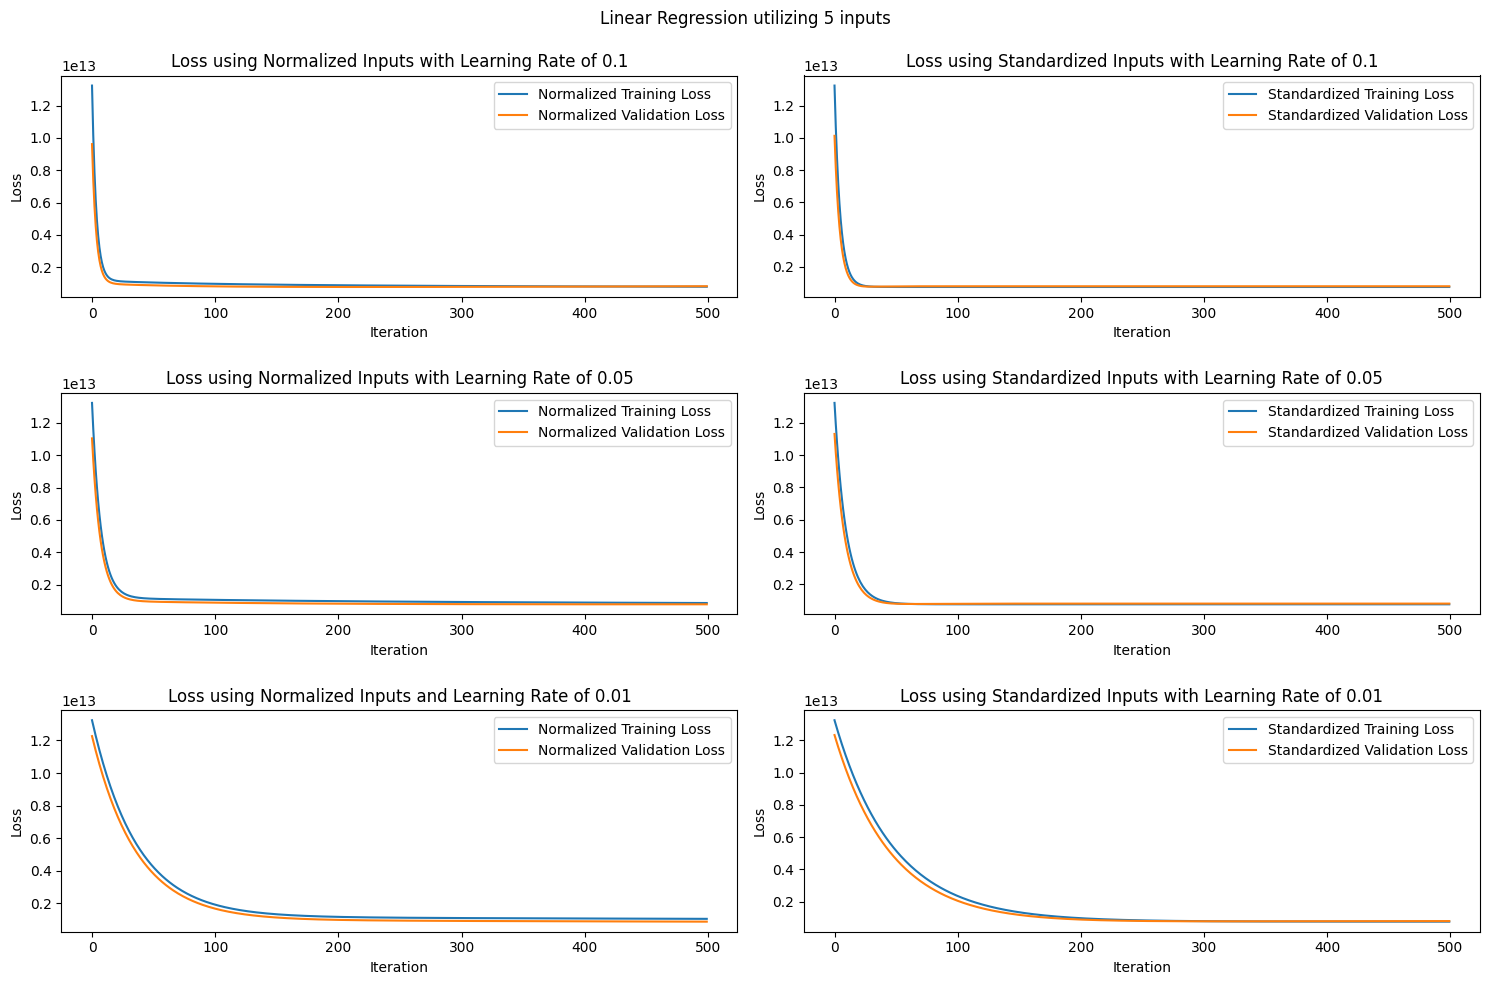

In [191]:
# Plot the losses
plt.figure(figsize=(15, 10))
plt.suptitle('Linear Regression utilizing 5 inputs')

plt.subplot(3, 2, 1)
plt.plot(norm_train_losses1, label="Normalized Training Loss")
plt.plot(norm_val_losses1, label="Normalized Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss using Normalized Inputs with Learning Rate of 0.1")

plt.subplot(3, 2, 2)
plt.plot(std_train_losses1, label="Standardized Training Loss")
plt.plot(std_val_losses1, label="Standardized Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss using Standardized Inputs with Learning Rate of 0.1")


plt.subplot(3, 2, 3)
plt.plot(norm_train_losses2, label="Normalized Training Loss")
plt.plot(norm_val_losses2, label="Normalized Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss using Normalized Inputs with Learning Rate of 0.05")

plt.subplot(3, 2, 4)
plt.plot(std_train_losses2, label="Standardized Training Loss")
plt.plot(std_val_losses2, label="Standardized Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss using Standardized Inputs with Learning Rate of 0.05")


plt.subplot(3, 2, 5)
plt.plot(norm_train_losses3, label="Normalized Training Loss")
plt.plot(norm_val_losses3, label="Normalized Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss using Normalized Inputs and Learning Rate of 0.01")

plt.subplot(3, 2, 6)
plt.plot(std_train_losses3, label="Standardized Training Loss")
plt.plot(std_val_losses3, label="Standardized Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss using Standardized Inputs with Learning Rate of 0.01")

plt.tight_layout()
plt.show()

2 PART B

In [192]:
inputsb = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
alphasb = [0.1, 0.05, 0.01]
iterations = 500

# Training with normalized inputs
norm_train_losses1b, norm_val_losses1b = gradient_descent(inputsb, norm_train, norm_val, y_train, y_val, alphas[0], iterations)
norm_train_losses2b, norm_val_losses2b = gradient_descent(inputsb, norm_train, norm_val, y_train, y_val, alphas[1], iterations)
norm_train_losses3b, norm_val_losses3b = gradient_descent(inputsb, norm_train, norm_val, y_train, y_val, alphas[2], iterations)

# Training with standardized inputs
std_train_losses1b, std_val_losses1b = gradient_descent(inputsb, std_train, std_val, y_train, y_val, alphas[0], iterations)
std_train_losses2b, std_val_losses2b = gradient_descent(inputsb, std_train, std_val, y_train, y_val, alphas[1], iterations)
std_train_losses3b, std_val_losses3b = gradient_descent(inputsb, std_train, std_val, y_train, y_val, alphas[2], iterations)


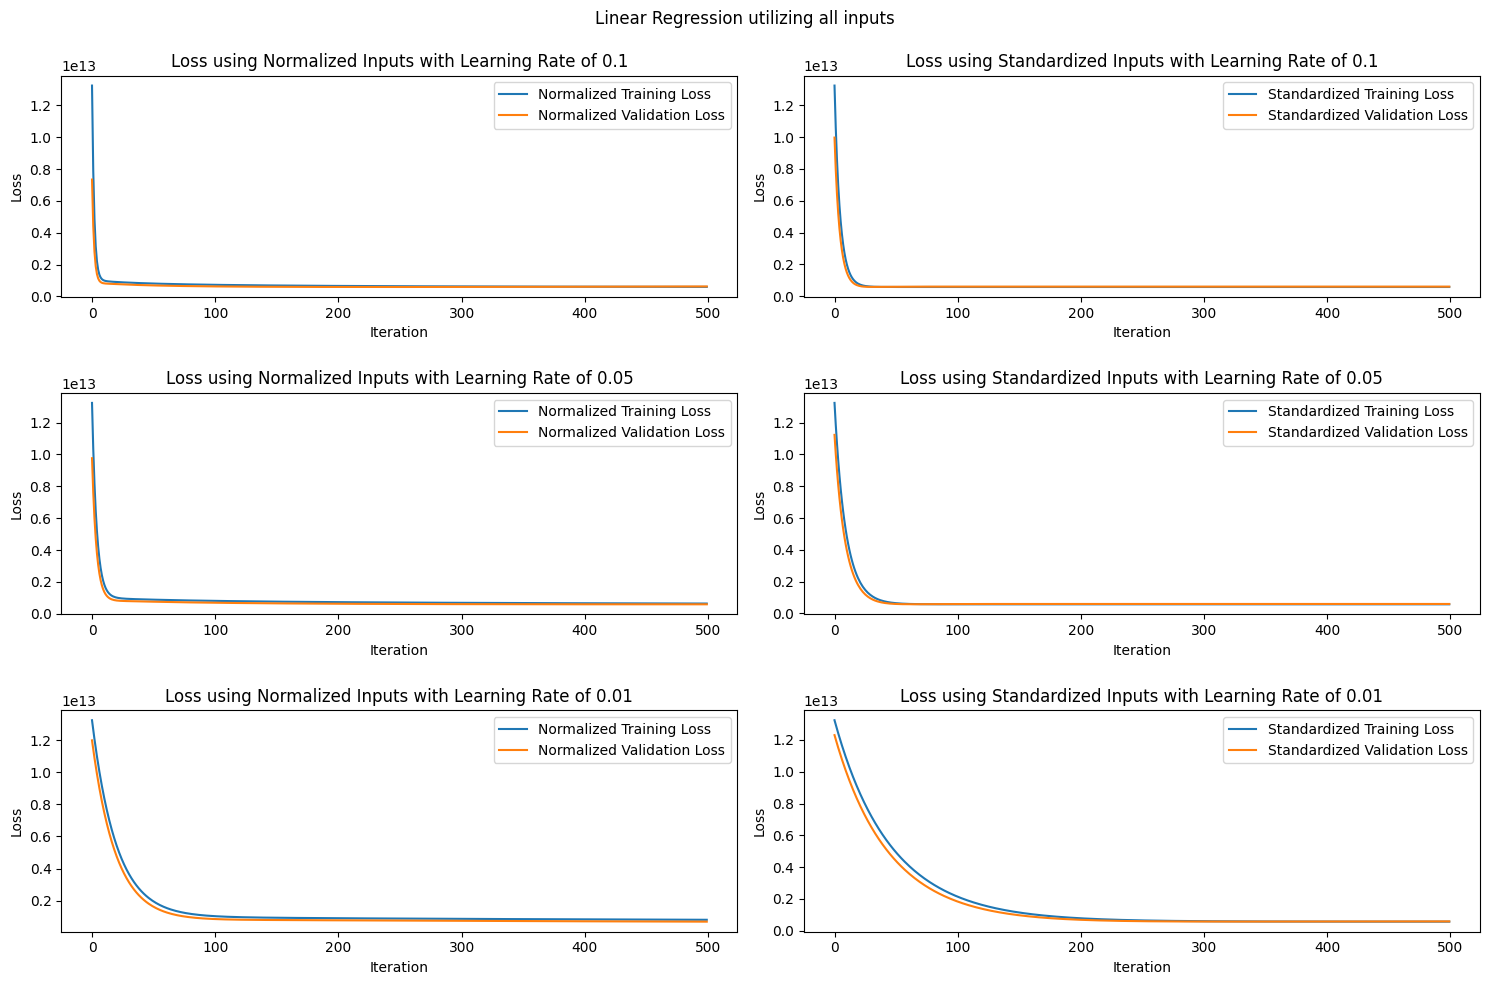

In [193]:
# Plot the losses
plt.figure(figsize=(15, 10))
plt.suptitle('Linear Regression utilizing all inputs')

plt.subplot(3, 2, 1)
plt.plot(norm_train_losses1b, label="Normalized Training Loss")
plt.plot(norm_val_losses1b, label="Normalized Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss using Normalized Inputs with Learning Rate of 0.1")

plt.subplot(3, 2, 2)
plt.plot(std_train_losses1b, label="Standardized Training Loss")
plt.plot(std_val_losses1b, label="Standardized Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss using Standardized Inputs with Learning Rate of 0.1")


plt.subplot(3, 2, 3)
plt.plot(norm_train_losses2b, label="Normalized Training Loss")
plt.plot(norm_val_losses2b, label="Normalized Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss using Normalized Inputs with Learning Rate of 0.05")

plt.subplot(3, 2, 4)
plt.plot(std_train_losses2b, label="Standardized Training Loss")
plt.plot(std_val_losses2b, label="Standardized Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss using Standardized Inputs with Learning Rate of 0.05")


plt.subplot(3, 2, 5)
plt.plot(norm_train_losses3b, label="Normalized Training Loss")
plt.plot(norm_val_losses3b, label="Normalized Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss using Normalized Inputs with Learning Rate of 0.01")

plt.subplot(3, 2, 6)
plt.plot(std_train_losses3b, label="Standardized Training Loss")
plt.plot(std_val_losses3b, label="Standardized Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss using Standardized Inputs with Learning Rate of 0.01")

plt.tight_layout()
plt.show()